In [23]:
%config InlineBackend.figure_formats = ['svg']

import glob
import pandas as pd
import json
import os
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm
import random

sns.set_theme(style="darkgrid", palette="colorblind")

## Statistiques sur les jeux de données

In [24]:
DATA_PATH = "../data"
COUNT_PATH = os.path.join(DATA_PATH, "count")

In [25]:
calibration_path_list = glob.glob(os.path.join(COUNT_PATH, "calibration-*.json"))
test_path_list = glob.glob(os.path.join(COUNT_PATH, "test-*.json"))

In [26]:
def open_and_read_json(file_path):
    with open(file_path, "r") as f:
        extract_dict = json.loads(f.read())
        extract_dict["name"] = os.path.basename(file_path)[:-5]
        return extract_dict

calibration_list = [open_and_read_json(file_path) for file_path in calibration_path_list]
test_list = [open_and_read_json(file_path) for file_path in test_path_list]

In [27]:
calibration_df = pd.DataFrame(calibration_list)
test_df = pd.DataFrame(test_list)

calibration_df.set_index("name", inplace=True)
test_df.set_index("name", inplace=True)

calibration_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

calibration_df = calibration_df.astype(int)
test_df = test_df.astype(int)

### Répartition du nombre de labels par mois/semaine

Text(0, 0.5, "Nombre d'exemples")

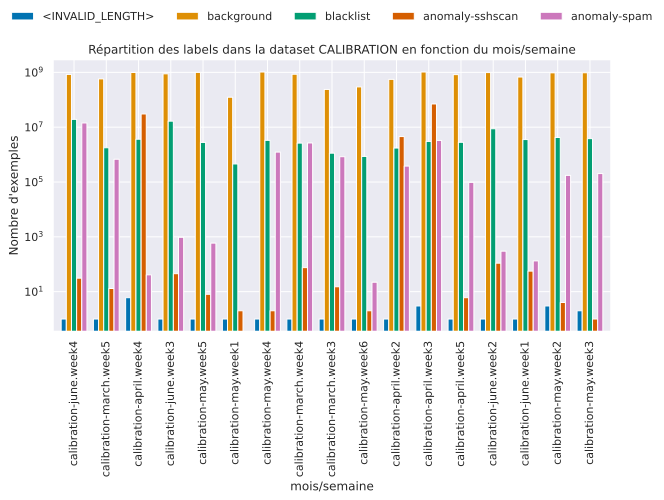

In [28]:
calibration_df.plot.bar(logy=True, figsize=(10, 5), width=0.8, title="Répartition des labels dans la dataset CALIBRATION en fonction du mois/semaine")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.1), frameon=False, ncol=10)
plt.xlabel('mois/semaine')
plt.ylabel("Nombre d'exemples")

Text(0, 0.5, "Nombre d'exemples")

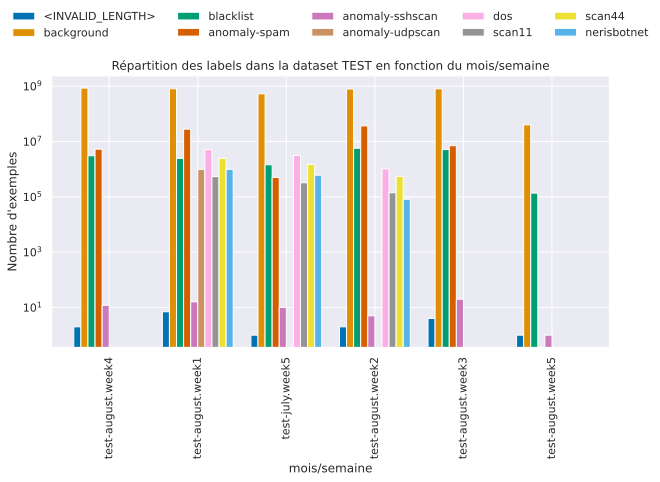

In [29]:
test_df.plot.bar(logy=True, figsize=(10, 5), width=0.8, title="Répartition des labels dans la dataset TEST en fonction du mois/semaine")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.1), frameon=False, ncol=5)
plt.xlabel('mois/semaine')
plt.ylabel("Nombre d'exemples")

### Total

In [30]:
3837761986+12852970147

16690732133

In [31]:
calibration_df

,<INVALID_LENGTH>,background,blacklist,anomaly-sshscan,anomaly-spam
name,,,,,
calibration-june.week4,1,843192954,19277175,31,14301324
calibration-march.week5,1,577297082,1777370,13,676271
calibration-april.week4,6,989178319,3637575,30445197,41
calibration-june.week3,1,887500109,16614562,45,958
calibration-may.week5,1,996775652,2776843,8,588
calibration-may.week1,1,124059484,456202,2,0
calibration-may.week4,1,1032991347,3309844,2,1234677
calibration-march.week4,1,854603763,2621251,75,2651069
calibration-march.week3,1,238703829,1125722,15,840320


In [32]:
calibration_df.sum()

<INVALID_LENGTH>             27
background          12852970147
blacklist              80373402
anomaly-sshscan       105277446
anomaly-spam           23844959
dtype: int64

In [33]:
test_df

,<INVALID_LENGTH>,background,blacklist,anomaly-spam,anomaly-sshscan,anomaly-udpscan,dos,scan11,scan44,nerisbotnet
name,,,,,,,,,,
test-august.week4,2,854170414,3069118,5287316,12,0,0,0,0,0
test-august.week1,7,811088135,2464585,27970000,16,989872,5093132,539018,2477203,992575
test-july.week5,1,531975100,1450738,503658,10,0,3134728,323120,1496504,607036
test-august.week2,2,793518112,5728174,36796698,5,0,1028245,140541,547468,81918
test-august.week3,4,806857033,5141634,7059245,20,0,0,0,0,0
test-august.week5,1,40153192,136402,0,1,0,0,0,0,0


In [34]:
test_df.sum()

<INVALID_LENGTH>            17
background          3837761986
blacklist             17990651
anomaly-spam          77616917
anomaly-sshscan             64
anomaly-udpscan         989872
dos                    9256105
scan11                 1002679
scan44                 4521175
nerisbotnet            1681529
dtype: int64

In [44]:
from collections import Counter
counter = Counter(calibration_df.sum().to_dict())
counter.update(test_df.sum().to_dict())
counter_serie = pd.Series(dict(counter))
counter_serie

<INVALID_LENGTH>             44
background          16690732133
blacklist              98364053
anomaly-sshscan       105277510
anomaly-spam          101461876
anomaly-udpscan          989872
dos                     9256105
scan11                  1002679
scan44                  4521175
nerisbotnet             1681529
dtype: int64

In [50]:
counter_serie.sort_values()*100/counter_serie.sort_values().sum()

<INVALID_LENGTH>    2.586214e-07
anomaly-udpscan     5.818229e-03
scan11              5.893505e-03
nerisbotnet         9.883622e-03
scan44              2.657438e-02
dos                 5.440515e-02
blacklist           5.781602e-01
anomaly-spam        5.963685e-01
anomaly-sshscan     6.187958e-01
background          9.810410e+01
dtype: float64

# Tirage aléatoire des index des données

In [35]:
name_count_dict = dict()

for column in calibration_df.columns:
    name_count_list = name_count_dict.get(column, [])
    name_count_list += list(calibration_df[column].to_dict().items())
    name_count_dict[column] = name_count_list

for column in test_df.columns:
    name_count_list = name_count_dict.get(column, [])
    name_count_list += list(test_df[column].to_dict().items())
    name_count_dict[column] = name_count_list

In [40]:
del name_count_dict["<INVALID_LENGTH>"]

In [41]:
subset_size_per_label_dict = dict()
for label, set_count_list in tqdm(name_count_dict.items()):
    total_count = sum([value for _, value in set_count_list])
    try:
        subset_size = 900_000
        if label == "background":
            subset_size = 900_000*8
        index_list = np.array(random.sample(range(total_count), subset_size))
    except:
        print(label, total_count)
        break

    subset_size_per_set_dict = dict()
    for set_name, count in tqdm(set_count_list, leave=False):
        index_for_dataset_list = index_list[index_list<count]
        index_list = index_list[index_list>=count]
        index_list -= count
        subset_size_per_set_dict[set_name] = index_for_dataset_list
    
    subset_size_per_label_dict[label] = subset_size_per_set_dict

100%|██████████| 9/9 [00:14<00:00,  1.62s/it]


In [42]:
export_dataset_dict = dict()
for label, subset_index_per_set_dict in subset_size_per_label_dict.items():
    for dataset_name, index_list in subset_index_per_set_dict.items():
        dataset_dict = export_dataset_dict.get(dataset_name, {})
        dataset_dict[label] = index_list
        export_dataset_dict[dataset_name] = dataset_dict

In [43]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

In [44]:
with open("test-dataset_label_index.json", "w") as f:
    f.write(json.dumps(export_dataset_dict, cls=NpEncoder))

# Tests

In [2]:
import pandas as pd

In [11]:
x00 = pd.read_csv("../data/split/x00")
target_x00 = x00.iloc[:,-1].fillna("background")
del x00
x01 = pd.read_csv("../data/split/x01")
target_x01 = x01.iloc[:,-1].fillna("background")
del x01

In [15]:
target_x00

0           background
1           background
2           background
3           background
4           background
               ...    
10352371    background
10352372    background
10352373    background
10352374    background
10352375    background
Name: background, Length: 10352376, dtype: object

In [22]:
target_x00_dict = target_x00.value_counts().to_dict()
target_x00_dict["name"]="x00"

target_x01_dict = target_x01.value_counts().to_dict()
target_x01_dict["name"]="x01"

In [26]:
df = pd.DataFrame([target_x00_dict, target_x01_dict]).set_index("name")
df

,background,blacklist,anomaly-spam
name,,,
x00,10321180,29456,1740
x01,10280428,54316,1903


In [27]:
name_count_dict = dict()

for column in df.columns:
    name_count_list = name_count_dict.get(column, [])
    name_count_list += list(df[column].to_dict().items())
    name_count_dict[column] = name_count_list

In [28]:
name_count_dict

{'background': [('x00', 10321180), ('x01', 10280428)],
 'blacklist': [('x00', 29456), ('x01', 54316)],
 'anomaly-spam': [('x00', 1740), ('x01', 1903)]}

In [31]:
subset_size_per_label_dict = dict()
for label, set_count_list in tqdm(name_count_dict.items()):
    total_count = sum([value for _, value in set_count_list])
    try:
        subset_size = 1000
        if label == "background":
            subset_size = 1000*8
        index_list = np.array(random.sample(range(total_count), subset_size))
    except:
        print(label, total_count)
        break

    subset_size_per_set_dict = dict()
    for set_name, count in tqdm(set_count_list, leave=False):
        index_for_dataset_list = index_list[index_list<count]
        index_list = index_list[index_list>=count]
        index_list -= count
        subset_size_per_set_dict[set_name] = index_for_dataset_list
    
    subset_size_per_label_dict[label] = subset_size_per_set_dict

100%|██████████| 3/3 [00:00<00:00, 138.04it/s]


In [33]:
export_dataset_dict = dict()
for label, subset_index_per_set_dict in subset_size_per_label_dict.items():
    for dataset_name, index_list in subset_index_per_set_dict.items():
        dataset_dict = export_dataset_dict.get(dataset_name, {})
        dataset_dict[label] = index_list
        export_dataset_dict[dataset_name] = dataset_dict

In [80]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

In [81]:
with open("test-dataset_label_index.json", "w") as f:
    f.write(json.dumps(export_dataset_dict, cls=NpEncoder))

In [73]:
len(export_dataset_dict["x00"]["blacklist"])

329

In [46]:
FILE_TO_TEST = ["../data/split/x00", "../data/split/x01"]

import csv
from collections import Counter

label_counter = Counter([])
edd = export_dataset_dict["x00"]
with open("dataset0.csv", "w") as extract_f:
    writer = csv.writer(extract_f)
    with open(FILE_TO_TEST[0], "r") as f:
        reader = csv.reader(f)
        for row in tqdm(reader):
            if len(row) == 13:
                target = row[-1]
                current_label_index = label_counter.get(target, 0)
                label_counter.update([target])
                if current_label_index in edd[target]:
                    writer.writerow(row)

label_counter = Counter([])
edd = export_dataset_dict["x01"]
with open("dataset1.csv", "w") as extract_f:
    writer = csv.writer(extract_f)
    with open(FILE_TO_TEST[1], "r") as f:
        reader = csv.reader(f)
        for row in tqdm(reader):
            if len(row) == 13:
                target = row[-1]
                current_label_index = label_counter.get(target, 0)
                label_counter.update([target])
                if current_label_index in edd[target]:
                    writer.writerow(row)


10352378it [02:14, 77044.12it/s]
10336648it [02:14, 76956.85it/s]


In [74]:
d0 = pd.read_csv("dataset0.csv")
d1 = pd.read_csv("dataset1.csv")
d = pd.read_csv("dataset.csv", names=["h"+str(i) for i in range(13)])

In [75]:
d0.shape, d1.shape, d.shape

((4776, 13), (5222, 13), (10000, 13))

In [76]:
d.iloc[:,-1].value_counts()

background      8000
blacklist       1000
anomaly-spam    1000
Name: h12, dtype: int64

In [69]:
d0.iloc[:,-1].value_counts()

background      3993
anomaly-spam     455
blacklist        328
Name: blacklist, dtype: int64

In [70]:
d1.iloc[:,-1].value_counts()

background      4006
blacklist        671
anomaly-spam     545
Name: background, dtype: int64

In [84]:
pd.read_csv("dd0.csv", names=["h"+str(i) for i in range(13)]).iloc[:,-1].value_counts()

background      3993
anomaly-spam     455
blacklist        329
Name: h12, dtype: int64